<a href="https://colab.research.google.com/github/EEdwardsA/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [3]:
# TODO your work here!
import pandas as pd
import numpy as py
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [ ]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data


In [5]:
column_headers = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',names=column_headers)
print(df)

     Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]


In [6]:
print(df.head())
df.tail()

  Sex  Length  Diameter  ...  Viscera_weight  Shell_weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [7]:
df.shape

(4177, 9)

In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# I think all the columns are numeric, so I don't need to check non-numeric values, but I'm going to look up dtypes to make sure I'm right

df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [12]:
# Good thing I double-checked because obviously, sex is a string, not a number!

df.describe(exclude='number')

,Sex
count,4177
unique,3
top,M
freq,1528


In [13]:
# Hmm, I expected unique to equal 2, not 3, so I am going to get the data counts for the sex column to see what is there besides M and F

df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [ ]:
# I! Maybe for "Intersex"? Cool. Now I know something new about abalone
# ETA hours later: oh actually it stands for infant.

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [14]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

from google.colab import files
uploaded = files.upload()

Saving abalone.data to abalone.data


In [41]:
# Oh, oops, I was supposed to pick a brand new data set. How about...
from google.colab import files
uploaded = files.upload()

Saving agaricus-lepiota.data to agaricus-lepiota.data


In [42]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

Streaming output truncated to the last 5000 lines.
e,f,y,g,t,n,f,c,b,n,t,b,s,s,p,p,p,w,o,p,n,y,d
e,f,y,g,t,n,f,c,b,n,t,b,s,s,w,p,p,w,o,p,k,y,d
e,f,y,g,t,n,f,c,b,p,t,b,s,s,w,p,p,w,o,p,n,v,d
e,f,f,e,t,n,f,c,b,w,t,b,s,s,p,g,p,w,o,p,n,v,d
e,f,y,n,t,n,f,c,b,w,t,b,s,s,p,w,p,w,o,p,n,y,d
e,f,y,g,t,n,f,c,b,p,t,b,s,s,g,g,p,w,o,p,k,v,d
e,f,y,n,t,n,f,c,b,u,t,b,s,s,w,g,p,w,o,p,n,y,d
e,f,y,g,t,n,f,c,b,p,t,b,s,s,w,p,p,w,o,p,k,y,d
e,f,y,g,t,n,f,c,b,u,t,b,s,s,g,p,p,w,o,p,n,v,d
e,x,f,n,t,n,f,c,b,u,t,b,s,s,w,p,p,w,o,p,k,y,d
e,f,y,e,t,n,f,c,b,p,t,b,s,s,w,p,p,w,o,p,k,y,d
e,f,f,e,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,k,v,d
e,f,y,e,t,n,f,c,b,p,t,b,s,s,w,p,p,w,o,p,n,v,d
p,x,f,y,f,f,f,c,b,g,e,b,k,k,n,n,p,w,o,l,h,v,p
e,f,y,g,t,n,f,c,b,u,t,b,s,s,p,w,p,w,o,p,n,y,d
e,f,y,n,t,n,f,c,b,p,t,b,s,s,p,p,p,w,o,p,k,v,d
p,x,f,g,f,f,f,c,b,p,e,b,k,k,p,b,p,w,o,l,h,y,d
e,f,y,g,t,n,f,c,b,w,t,b,s,s,p,p,p,w,o,p,k,y,d
e,f,y,g,t,n,f,c,b,u,t,b,s,s,w,g,p,w,o,p,k,y,d
e,f,y,g,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,n,y,d
e,f,y,e,t,n,f,c,b,n,t,b,s,s,g

Are the headers showing up properly?

Look at the first 5 and the last 5 rows, do they seem to be in order?

Does the dataset have the correct number of rows and columns as described in the UCI page?

Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.

Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?

if NaN values or other missing value indicators are not being detected by df.isnull().sum() find a way to replace whatever is indicating the missing values with np.NaN.

Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns.

In [45]:
column_names= ['cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment',
               'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
               'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
               'veil-type','veil-color','ring-number','ring-type','spore-print-color',
               'population','habitat']
df = pd.read_csv("agaricus-lepiota.data",names=column_names)
df.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [46]:
df.shape

(8124, 22)

In [47]:
# Check for missing values (UCI just says "yes")

df.isnull().sum()


cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [49]:
# Turn question marks into NaN
import numpy as np
df = df.replace({"?":np.NaN})
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [51]:
# ring-number is weirdly encoded. I'm going to try turning the values into 0,1,2 instead of n,o,t

# actually, I'll come back to that later, I'm worried I'm running behind.

df.describe()


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [55]:
# Your Code Here

pd.crosstab(df['cap-color'],df['gill-color'])

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
cap-color,,,,,,,,,,,,
b,0,24,8,32,0,0,0,32,8,0,64,0
c,0,0,0,0,0,0,0,0,0,0,38,6
e,864,24,0,0,0,144,0,144,0,144,174,6
g,0,0,292,312,76,236,0,532,0,160,232,0
n,864,24,12,64,108,348,64,284,0,144,302,70
p,0,24,24,0,0,16,0,16,8,16,40,0
r,0,0,0,4,0,0,0,4,0,4,4,0
u,0,0,0,4,0,0,0,4,0,4,4,0
w,0,0,136,100,160,192,0,212,8,20,212,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

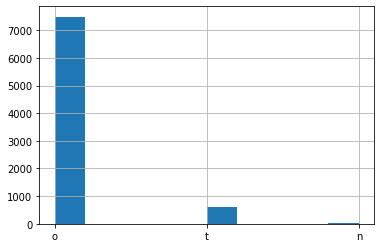

In [56]:
# Your Code Here

df['ring-number'].hist();

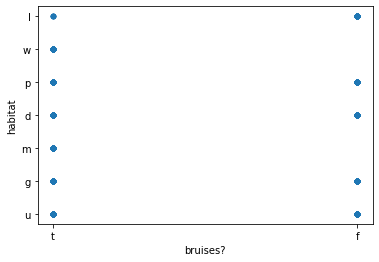

In [69]:
df_diff = df.replace({'ring-number': {'n': 0, 'o':1, 't':2}})
df_diff.plot.scatter('bruises?','habitat')

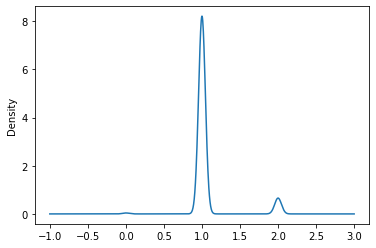

In [66]:
df_diff['ring-number'].plot.density()

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [67]:
# Your Code Here
df_diff

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,1,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,1,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,1,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,1,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,1,p,b,c,l
e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,1,p,b,v,l
e,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,1,p,b,c,l
p,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,1,e,w,v,l


In [60]:
pd.crosstab(df_diff['cap-color'],df_diff['ring-number'])

ring-number,0,1,2
cap-color,,,
b,0,96,72
c,12,24,8
e,12,1440,48
g,0,1688,152
n,12,2200,72
p,0,64,80
r,0,16,0
u,0,16,0
w,0,872,168


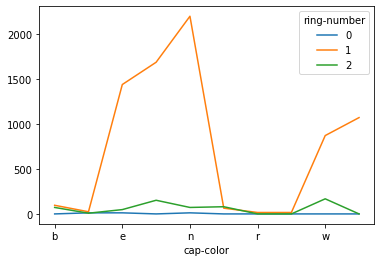

In [61]:
pd.crosstab(df_diff['cap-color'],df_diff['ring-number']).plot();

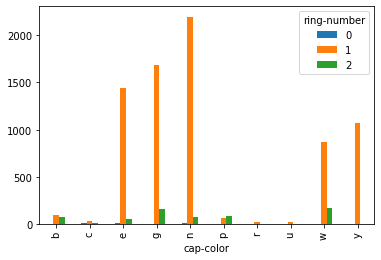

In [62]:
pd.crosstab(df_diff['cap-color'],df_diff['ring-number']).plot(kind='bar');

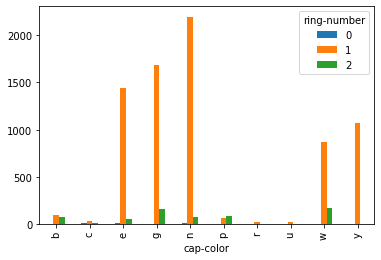

In [71]:
# To make this more readable, I'm going to turn the letters into actual color names, to get more practice with replacing via dictionaries

df_diff = df.replace({'cap-color': {'b': 'buff', 'n':'brown', 'c':'cinnamon', 
                                    'g':'gray','r':'green','p':'pink','u':'purple',
                                    'e':'red','w':'white','y':'yellow'}})
df_diff = df.replace({'ring-number': {'n': 0, 'o':1, 't':2}})
pd.crosstab(df_diff['cap-color'],df_diff['ring-number']).plot(kind='bar');

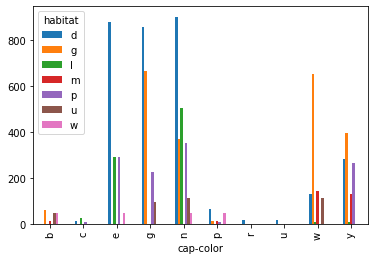

In [78]:
#Trying to plot crosstabs using only categorical data

pd.crosstab(df_diff['cap-color'],df_diff['habitat']).plot(kind='bar');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

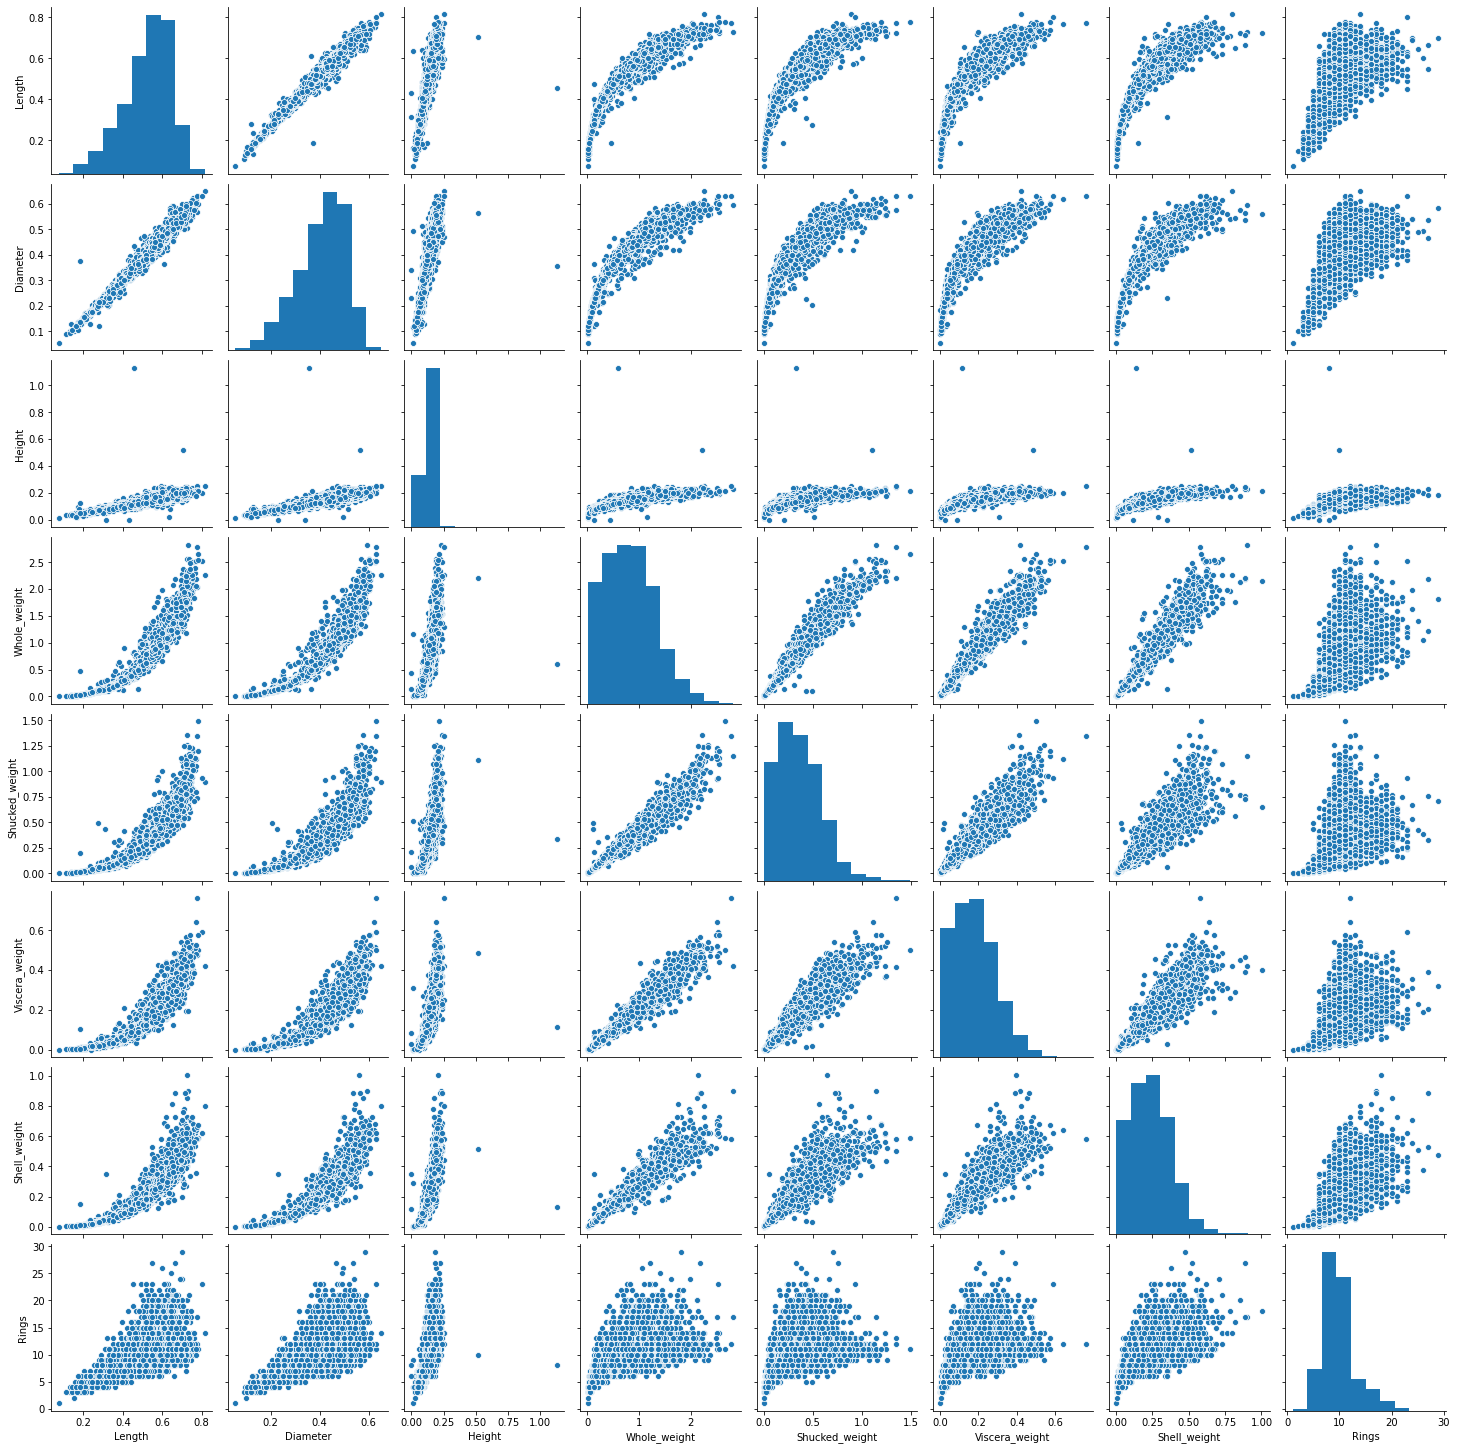

In [84]:
column_headers = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
dfa = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',names=column_headers)
import seaborn as sns

g = sns.pairplot(dfa)

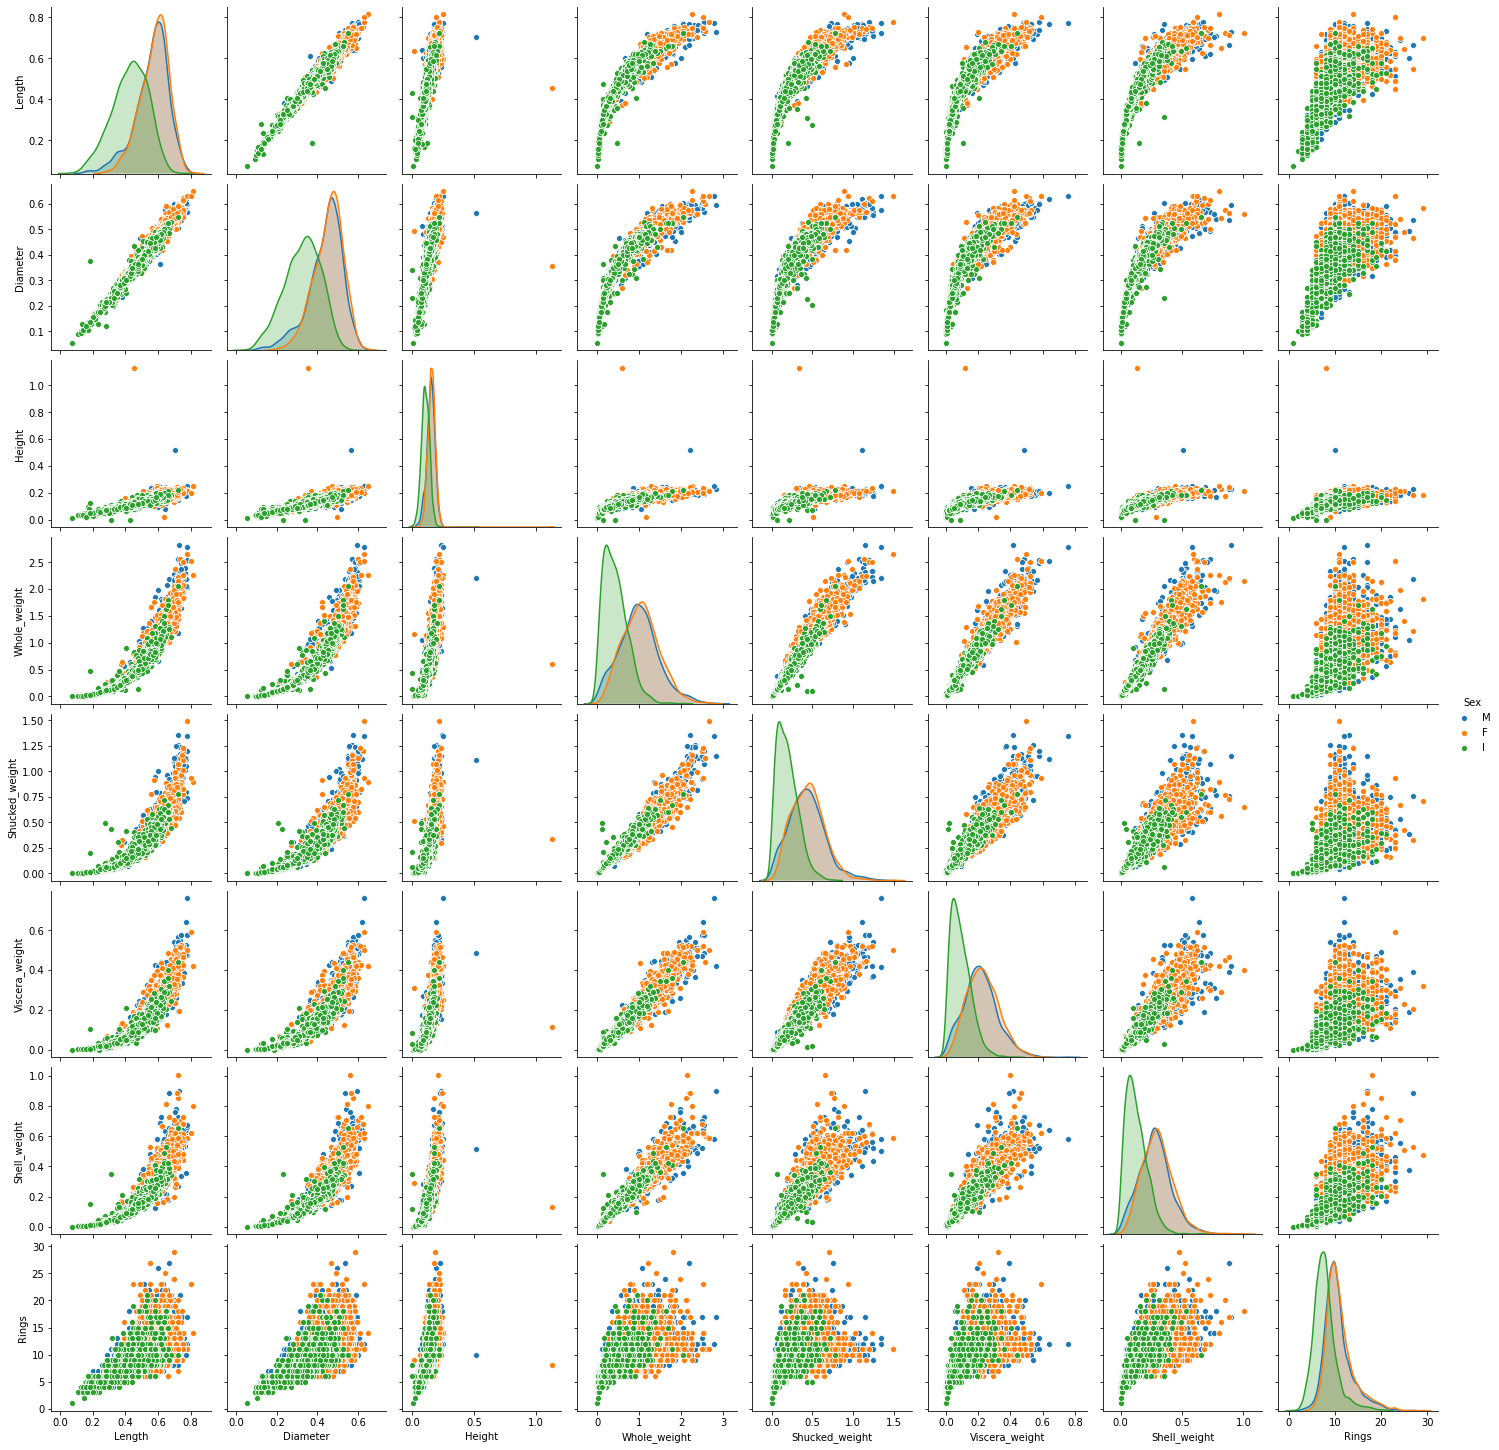

In [86]:
g = sns.pairplot(dfa, hue="Sex")

In [92]:
# Separating abalone lengths into quartiles by using qcut

binned_lengths = pd.qcut(dfa['Length'],4)
binned_lengths

0        (0.45, 0.545]
1        (0.074, 0.45]
2        (0.45, 0.545]
3        (0.074, 0.45]
4        (0.074, 0.45]
             ...      
4172    (0.545, 0.615]
4173    (0.545, 0.615]
4174    (0.545, 0.615]
4175    (0.615, 0.815]
4176    (0.615, 0.815]
Name: Length, Length: 4177, dtype: category
Categories (4, interval[float64]): [(0.074, 0.45] < (0.45, 0.545] < (0.545, 0.615] < (0.615, 0.815]]

In [93]:
#Separating abalone weights into quartiles

binned_weights = pd.qcut(dfa['Whole_weight'],4)
binned_weights

0         (0.442, 0.8]
1       (0.001, 0.442]
2         (0.442, 0.8]
3         (0.442, 0.8]
4       (0.001, 0.442]
             ...      
4172      (0.8, 1.153]
4173      (0.8, 1.153]
4174    (1.153, 2.826]
4175      (0.8, 1.153]
4176    (1.153, 2.826]
Name: Whole_weight, Length: 4177, dtype: category
Categories (4, interval[float64]): [(0.001, 0.442] < (0.442, 0.8] < (0.8, 1.153] < (1.153, 2.826]]